# Integer Encoding

In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

import torch
from torchtext.vocab import build_vocab_from_iterator

### DictVectorizer
각 단어의 수를 세어놓은 사전에서 BOW 인코딩 벡터를 만든다.
- Bag of Words는 문서가 가지는 모든 단어(Words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 방법이다.

In [2]:
from sklearn.feature_extraction import DictVectorizer

vect = DictVectorizer(sparse=False)

In [3]:
data = [{'A': 1, 'B': 2}, {'B': 3, 'C': 1}]
X = vect.fit_transform(data) # 인코딩 수치 벡터로 변환(X)

X는 아래와 같이 변환됨
> {'A': 1, 'B': 2} -> [1, 2, 0]
> {'B': 3, 'C': 1} -> [0, 3, 1]

In [4]:
X

array([[1., 2., 0.],
       [0., 3., 1.]])

In [5]:
vect.feature_names_

['A', 'B', 'C']

In [6]:
vect.transform({'A': 1, 'E': 3}) # E는 제외됨

array([[1., 0., 0.]])

In [7]:
vect.transform({'C': 4, 'D': 3}) # D는 제외됨

array([[0., 0., 4.]])

In [8]:
vect.transform({'B': 4, 'T': 3})

array([[0., 4., 0.]])

In [9]:
vect.transform([{'B': 4, 'T': 3}, {'C': 4, 'A': 3}])

array([[0., 4., 0.],
       [3., 0., 4.]])

### CountVectorizer
> 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩 벡터를 만든다.

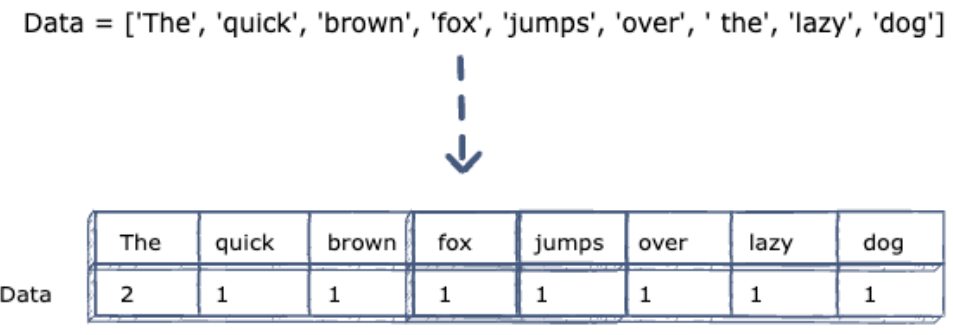

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]

In [12]:
vect = CountVectorizer() # 객체화

vect.fit(corpus) # 학습

vect.vocabulary_ # 학습 데이터 확인

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

In [13]:
vect.transform(['This This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 2]])

In [14]:
vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [15]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]])

#### stop words
> stop words는 문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말한다. 보통 관사, 접속사, 조사 등이 여기에 해당한다.

In [16]:
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}

In [17]:
vect.transform(corpus).toarray()

array([[1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 2, 0],
       [0, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0]])

#### token
> analyzer, tokenizer 등의 인수로 사용할 토큰 생성기를 선택할 수 있다.

In [18]:
vect = CountVectorizer(analyzer="char").fit(corpus)
vect.vocabulary_

{'t': 16,
 'h': 8,
 'i': 9,
 's': 15,
 ' ': 0,
 'e': 6,
 'f': 7,
 'r': 14,
 'd': 5,
 'o': 13,
 'c': 4,
 'u': 17,
 'm': 11,
 'n': 12,
 '.': 1,
 'a': 3,
 '?': 2,
 'l': 10}

In [19]:
vect.transform(corpus).toarray()

array([[4, 1, 0, 0, 1, 1, 2, 1, 2, 3, 0, 1, 1, 1, 1, 3, 4, 1],
       [5, 1, 0, 0, 3, 3, 4, 0, 2, 2, 0, 1, 3, 3, 0, 4, 3, 1],
       [3, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0],
       [4, 0, 1, 0, 1, 1, 2, 1, 2, 3, 0, 1, 1, 1, 1, 3, 4, 1],
       [2, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 3, 1]])

In [20]:
import nltk
nltk.download('punkt')

vect = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
vect.vocabulary_

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'this': 11,
 'is': 5,
 'the': 9,
 'first': 4,
 'document': 3,
 '.': 0,
 'second': 8,
 'and': 2,
 'third': 10,
 'one': 7,
 '?': 1,
 'last': 6}

#### N-gram
> N-gram은 단어장 생성에 사용할 토큰의 크기를 결정한다. 모노그램(monogram)은 토큰 하나만 단어로 사용하며 바이그램(bigram)은 두 개의 연결된 토큰을 하나의 단어로 사용한다.

In [21]:
vect = CountVectorizer(ngram_range=(2, 2)).fit(corpus) # 최소 2개, 최대 2개 문자로 구성
vect.vocabulary_

{'this is': 12,
 'is the': 2,
 'the first': 7,
 'first document': 1,
 'the second': 9,
 'second second': 6,
 'second document': 5,
 'and the': 0,
 'the third': 10,
 'third one': 11,
 'is this': 3,
 'this the': 13,
 'the last': 8,
 'last document': 4}

In [22]:
vect = CountVectorizer(ngram_range=(1, 2)).fit(corpus) # 최소 1개, 최대 2개 문자로 구성
vect.vocabulary_

{'this': 21,
 'is': 5,
 'the': 14,
 'first': 3,
 'document': 2,
 'this is': 22,
 'is the': 6,
 'the first': 15,
 'first document': 4,
 'second': 11,
 'the second': 17,
 'second second': 13,
 'second document': 12,
 'and': 0,
 'third': 19,
 'one': 10,
 'and the': 1,
 'the third': 18,
 'third one': 20,
 'is this': 7,
 'this the': 23,
 'last': 8,
 'the last': 16,
 'last document': 9}

#### 빈도수
> `max_df, min_df`인수를 사용하여 문서에서 토큰이 나타난 횟수를 기준으로 단어장을 구성할 수도 있다.
> 토큰의 빈도가 `max_df`로 지장한 값을 초과 하거나 `min_df`로 지정한 값보다 작은 경우에는 무시한다.

In [23]:
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus) # 단어별 빈도수: 최대 4개, 최소 2개
vect.vocabulary_, vect.stop_words_

({'this': 3, 'is': 2, 'first': 1, 'document': 0},
 {'and', 'last', 'one', 'second', 'the', 'third'})

### TfidfVectorizer
> `CountVectorizer`와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 인코딩 벡터를 만든다.

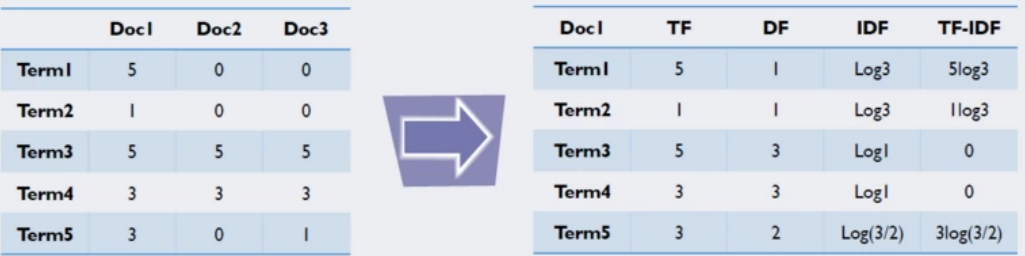

In [24]:
corpus

['This is the first document.',
 'This is the second second document.',
 'And the third one.',
 'Is this the first document?',
 'The last document?']

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.24151532, 0.        , 0.28709733, 0.        ,
        0.        , 0.85737594, 0.20427211, 0.        , 0.28709733],
       [0.55666851, 0.        , 0.        , 0.        , 0.        ,
        0.55666851, 0.        , 0.26525553, 0.55666851, 0.        ],
       [0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.45333103, 0.        , 0.        , 0.80465933,
        0.        , 0.        , 0.38342448, 0.        , 0.        ]])

In [26]:
pd.DataFrame(tfidv.transform(corpus).toarray(), columns = tfidv.get_feature_names_out())

,and,document,first,is,last,one,second,the,third,this
0,0.000000,0.389476,0.557751,0.462983,0.000000,0.000000,0.000000,0.329417,0.000000,0.462983
1,0.000000,0.241515,0.000000,0.287097,0.000000,0.000000,0.857376,0.204272,0.000000,0.287097
2,0.556669,0.000000,0.000000,0.000000,0.000000,0.556669,0.000000,0.265256,0.556669,0.000000
3,0.000000,0.389476,0.557751,0.462983,0.000000,0.000000,0.000000,0.329417,0.000000,0.462983
4,0.000000,0.453331,0.000000,0.000000,0.804659,0.000000,0.000000,0.383424,0.000000,0.000000


## WordCloud
> 단어구름 만들어 시각화하기

In [27]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=500,height=500)

In [33]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]

In [29]:
vect = CountVectorizer()

tdm = vect.fit_transform(corpus)
tdm

<5x10 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [30]:
df_tdm = pd.DataFrame(tdm.toarray(),columns=vect.get_feature_names_out())
df_tdm

,and,document,first,is,last,one,second,the,third,this
0,0,1,1,1,0,0,0,1,0,1
1,0,1,0,1,0,0,2,1,0,1
2,1,0,0,0,0,1,0,1,1,0
3,0,1,1,1,0,0,0,1,0,1
4,0,1,0,0,1,0,0,1,0,0


In [31]:
df_tdm.sum().to_dict()

{'and': 1,
 'document': 4,
 'first': 2,
 'is': 3,
 'last': 1,
 'one': 1,
 'second': 2,
 'the': 5,
 'third': 1,
 'this': 3}

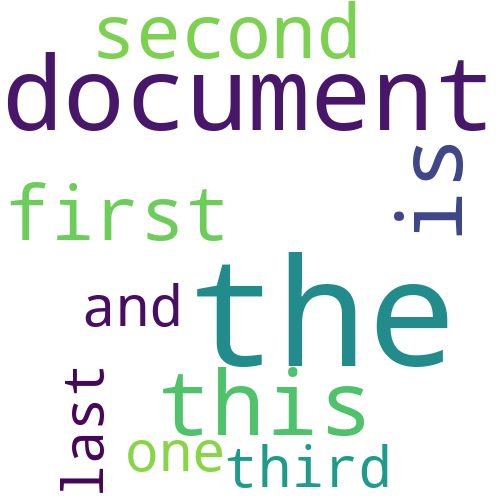

In [32]:
cloud = wc.generate_from_frequencies(df_tdm.sum().to_dict())
cloud.to_image()